# Image Steganography Demo

In [1]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
from util import read_image_file, read_message_text_file, hide_message_in_image, extract_message_from_image, hide_message_in_image_MSB, extract_message_from_image_MSB, show_images

## We want to hide a message in this image

Text(0.5, 1.0, 'Delicious Image')

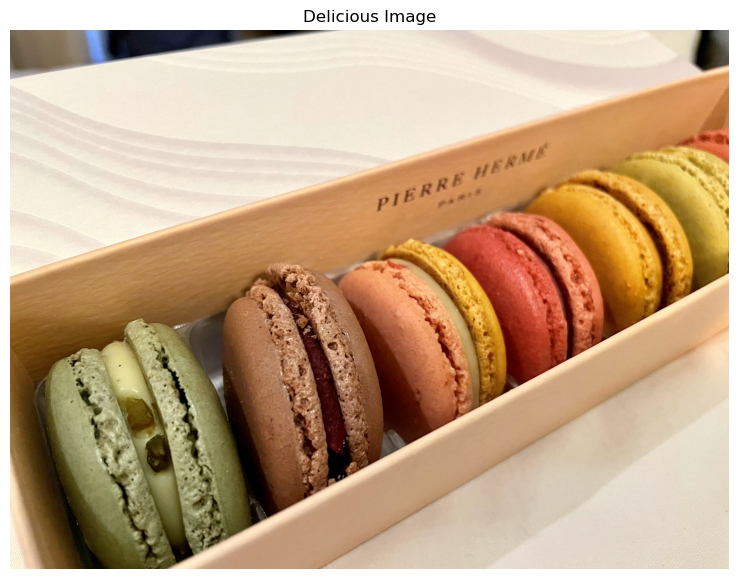

In [4]:
img = read_image_file('data/input_image.jpeg')
fig = plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.axis('off')
plt.title("Delicious Image")

## This is the message we want to hide

In [5]:
message_string, message_bytes, message_bits = read_message_text_file('data/message.txt')

In [6]:
print(message_string[:602])

Steganography is the process of hiding a secret message within a larger one in such a way that someone can not know the presence or contents of the hidden message. The purpose of Steganography is to maintain secret communication between two parties. Unlike cryptography, which conceals the contents of a secret message, steganography conceals the very fact that a message is communicated. Although steganography differs from cryptography, there are many analogies between the two, and some authors classify steganography as a form of cryptography since hidden communication is a type of secret message.


In [7]:
message_bytes[:1]

[83]

In [8]:
message_bits[:8]

[0, 1, 0, 1, 0, 0, 1, 1]

## Let's try hiding the message in the MSB of the pixel data

In [9]:
stego_img_MSB = hide_message_in_image_MSB(message_string, img)

In [10]:
img[0][0:3]

array([[100,  93,  67],
       [111, 104,  78],
       [116, 106,  81]], dtype=uint8)

In [11]:
stego_img_MSB[0][0:3]

array([[100, 221,  67],
       [239, 104,  78],
       [244, 234,  81]], dtype=uint8)

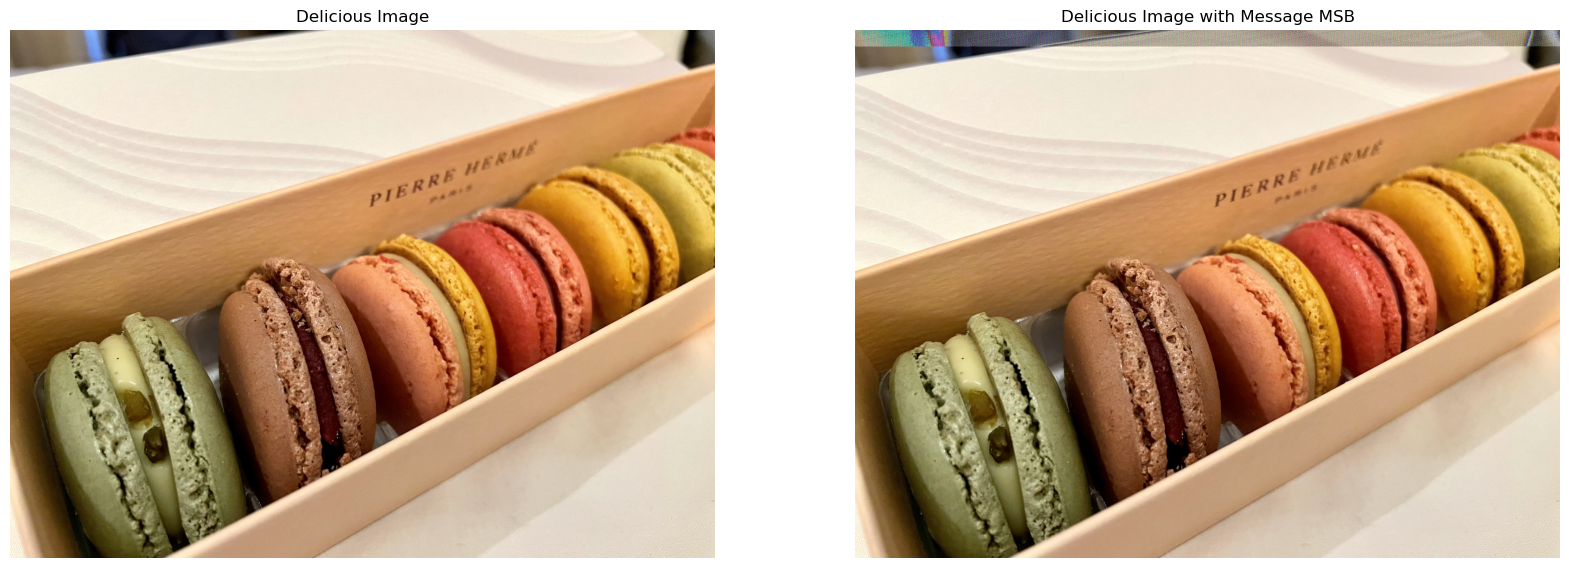

In [12]:
images = [(img,"Delicious Image"),  (stego_img_MSB, "Delicious Image with Message MSB")]
show_images(images)

Unfortunately we can see artifacts in the image from inserting the message in the most significant bits.

## Let's try hiding the message in the LSB of the pixel data

In [13]:
stego_img = hide_message_in_image(message_string, img)

In [14]:
img[0][0:3]

array([[100,  93,  67],
       [111, 104,  78],
       [116, 106,  81]], dtype=uint8)

In [15]:
stego_img[0][0:3]

array([[100,  93,  66],
       [111, 104,  78],
       [117, 107,  80]], dtype=uint8)

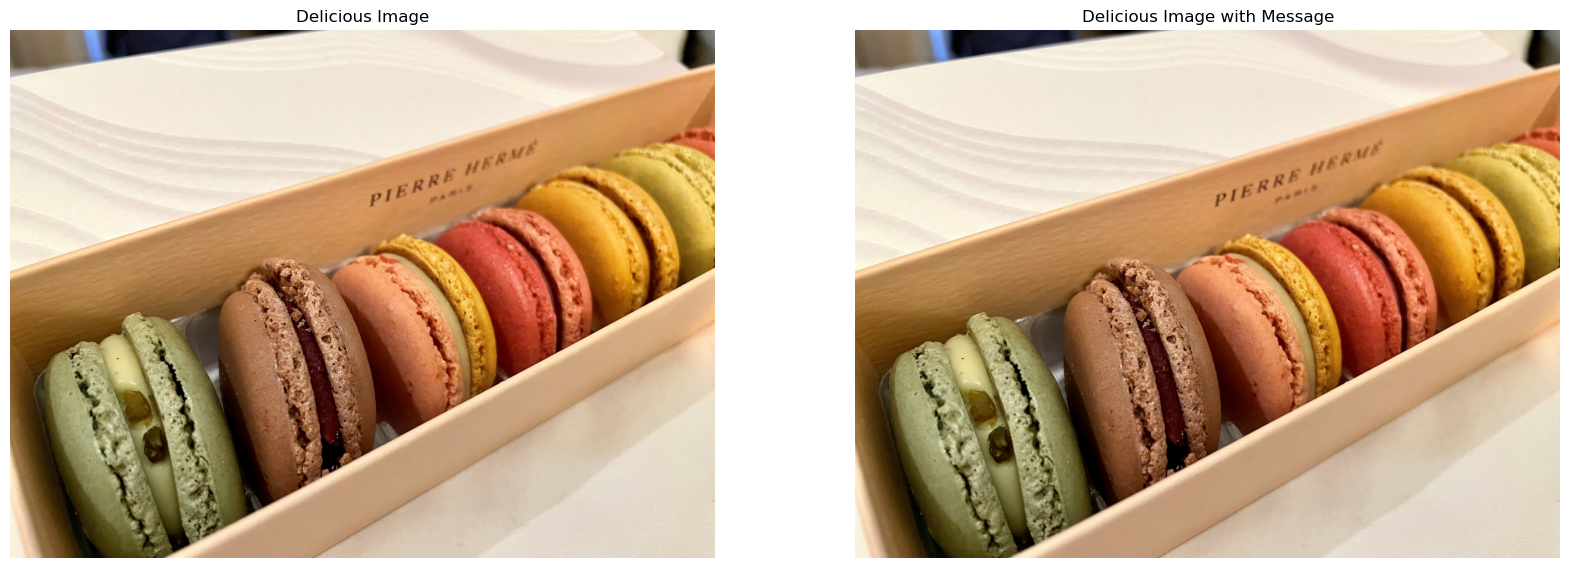

In [16]:
images = [(img,"Delicious Image"),  (stego_img, "Delicious Image with Message")]
show_images(images)

That's much better. There's no discernable difference between the images to a person looking at them.

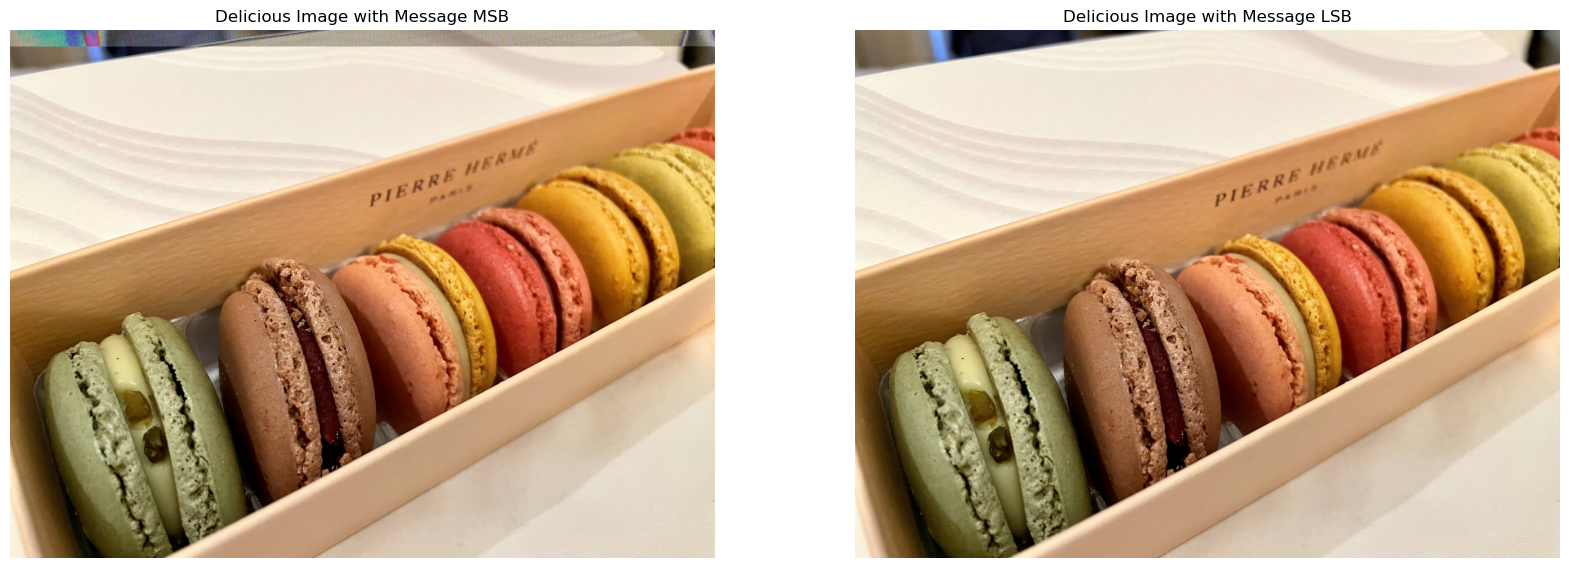

In [17]:
images = [(stego_img_MSB,"Delicious Image with Message MSB"),  (stego_img, "Delicious Image with Message LSB")]
show_images(images)

## Even though LSB is better than MSB for avoiding detection, both store and retrieve messages in an image just fine.

In [18]:
hidden_message = extract_message_from_image(stego_img)
print(hidden_message)

Steganography is the process of hiding a secret message within a larger one in such a way that someone can not know the presence or contents of the hidden message. The purpose of Steganography is to maintain secret communication between two parties. Unlike cryptography, which conceals the contents of a secret message, steganography conceals the very fact that a message is communicated. Although steganography differs from cryptography, there are many analogies between the two, and some authors classify steganography as a form of cryptography since hidden communication is a type of secret message.

Steganography is the process of hiding a secret message within a larger one in such a way that someone can not know the presence or contents of the hidden message. The purpose of Steganography is to maintain secret communication between two parties. Unlike cryptography, which conceals the contents of a secret message, steganography conceals the very fact that a message is communicated. Althoug

In [19]:
hidden_message_MSB = extract_message_from_image_MSB(stego_img_MSB)
print(hidden_message_MSB)

Steganography is the process of hiding a secret message within a larger one in such a way that someone can not know the presence or contents of the hidden message. The purpose of Steganography is to maintain secret communication between two parties. Unlike cryptography, which conceals the contents of a secret message, steganography conceals the very fact that a message is communicated. Although steganography differs from cryptography, there are many analogies between the two, and some authors classify steganography as a form of cryptography since hidden communication is a type of secret message.

Steganography is the process of hiding a secret message within a larger one in such a way that someone can not know the presence or contents of the hidden message. The purpose of Steganography is to maintain secret communication between two parties. Unlike cryptography, which conceals the contents of a secret message, steganography conceals the very fact that a message is communicated. Althoug